# Week 17, Lecture 01 CodeAlong
- Coefficients & Feature Importance

## Lesson Objectives

- By the end of this lesson, students will be able to:
    - Extract feature names from sklearn v1.1 objects
    - Extract and visualize coefficients
    - Save models to a joblib file


### The Data

Data comes from the World Health Organization.  It describes demographic, health, and economic data from countries around the world between 2000 and 2015. 

Each row is one country during one year.

> Task Inspired by: https://medium.com/@shanzehhaji/using-a-linear-regression-model-to-predict-life-expectancy-de3aef66ac21

- Kaggle Dataset on Life Expectancy:
    - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
## Importing Custom Functions
%load_ext autoreload
%autoreload 2
from CODE import data_enrichment as de

In [3]:
import pandas as pd
df = pd.read_csv("Data/Life Expectancy Data.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
# clean extra spaces
df.columns = df.columns.str.strip()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
pd.set_option('display.max_columns',0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## EDA

In [6]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

<Axes: >

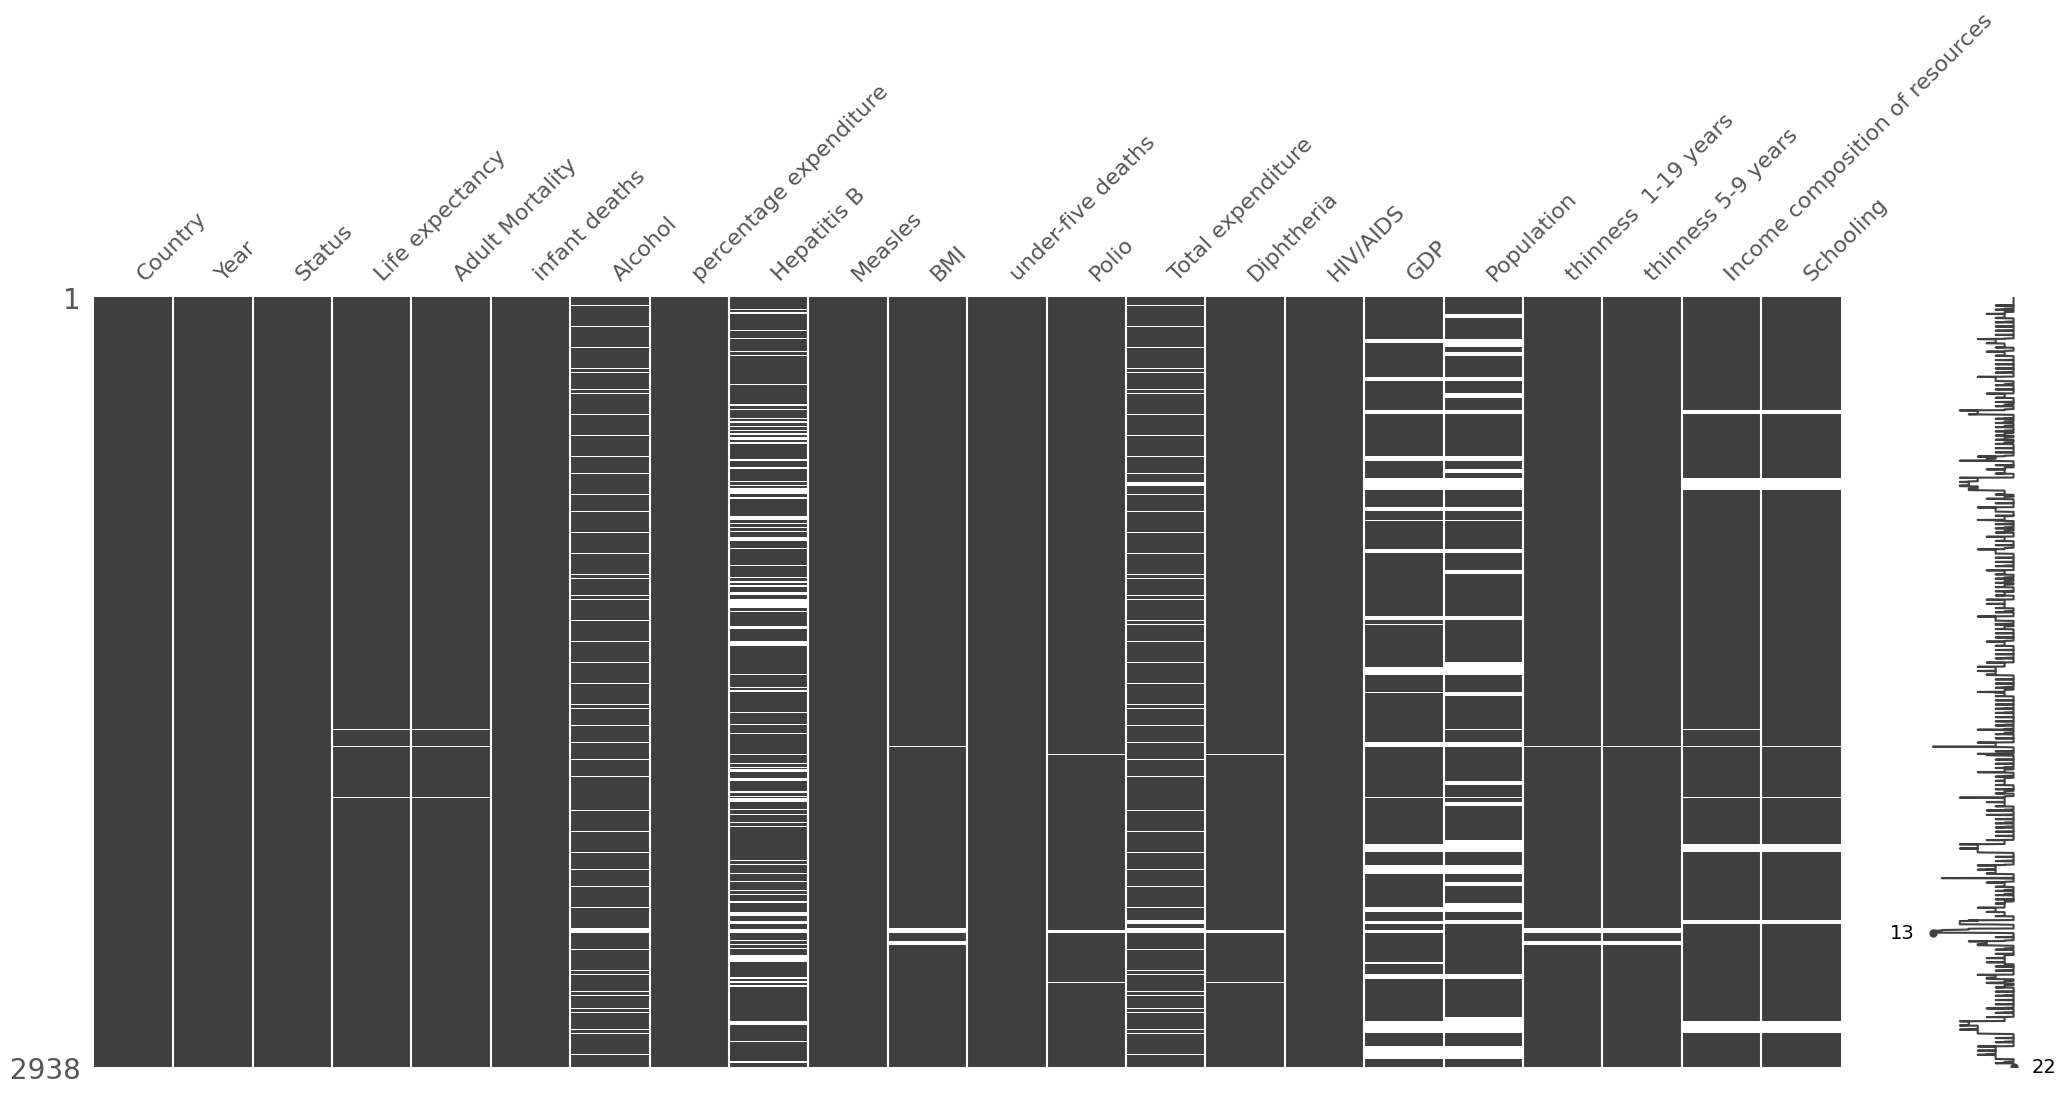

In [7]:
miss.matrix(df)

> Can't have null values for the target!

In [8]:
# drop null values ONLY FROM TARGET
df = df.dropna(subset=['Life expectancy'])

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


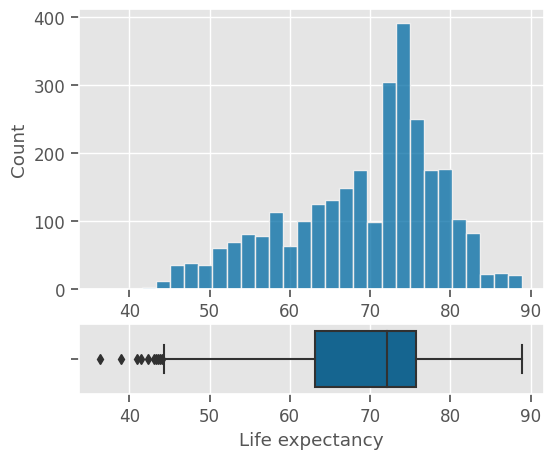

In [10]:
target = 'Life expectancy'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target,ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

## Preprocessing (with Sklearn v1.1+)

In [11]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


In [12]:
# ### Train Test Split
## Make x and y variables
target = "Life expectancy"
drop_feats = []

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head(3)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2414,South Sudan,2010,Developing,359.0,27,NaN,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
1576,Malawi,2009,Developing,491.0,36,1.16,7.915071,93.0,21,17.3,56,93.0,1.18,93.0,14.9,42.737966,1471462.0,6.9,6.8,0.415,9.9
2559,Tajikistan,2009,Developing,174.0,10,0.30,35.716138,93.0,0,35.9,12,93.0,5.93,93.0,0.2,666.345857,7472819.0,3.7,3.8,0.601,11.1


<center> <font color='red' size=5>Notice We Are Not Scaling!!! </font>
    
   **<center> Q: Why not? </center>**

In [13]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [14]:
## Make categorical preprocessing pipeline
## Drop one of the binary columns after OHE to reduce multicollinearity
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False,
                                      drop='if_binary'))

In [15]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F22CB1BE20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F22CC55D90>)])

## Make X_train_df and X_test_df, dataframe verisons of processed X_train/X_test.

### Get Features Names + Verbose Feature Names Out

In [16]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,...,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
2414,2010.0,359.0,27.0,4.580078,0.000000,81.438929,0.0,38.113041,41.0,82.490834,5.931982,82.451879,4.0,1562.239346,1.671920e+05,4.811567,4.819493,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1576,2009.0,491.0,36.0,1.160000,7.915071,93.000000,21.0,17.300000,56.0,93.000000,1.180000,93.000000,14.9,42.737966,1.471462e+06,6.900000,6.800000,0.415,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2559,2009.0,174.0,10.0,0.300000,35.716138,93.000000,0.0,35.900000,12.0,93.000000,5.930000,93.000000,0.2,666.345857,7.472819e+06,3.700000,3.800000,0.601,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1524,2013.0,178.0,0.0,15.040000,1968.816817,93

# Modeling - Linear Regression

In [17]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")



### Linear Model Assumptions

**Linearity:**
That the input features have a linear relationship with the target.

**Independence of Features:** (AKA Little-to-No Multicollinearity)
That the features are not strongly related to other features.

**Normality:**
The model's residuals are approximately normally distributed.

**Homoscedasticity:**
The model residuals have equal variance across all predictions.

## Model 1: Baseline LinReg

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.96,1.14,1.83
Test,0.96,1.20,1.88


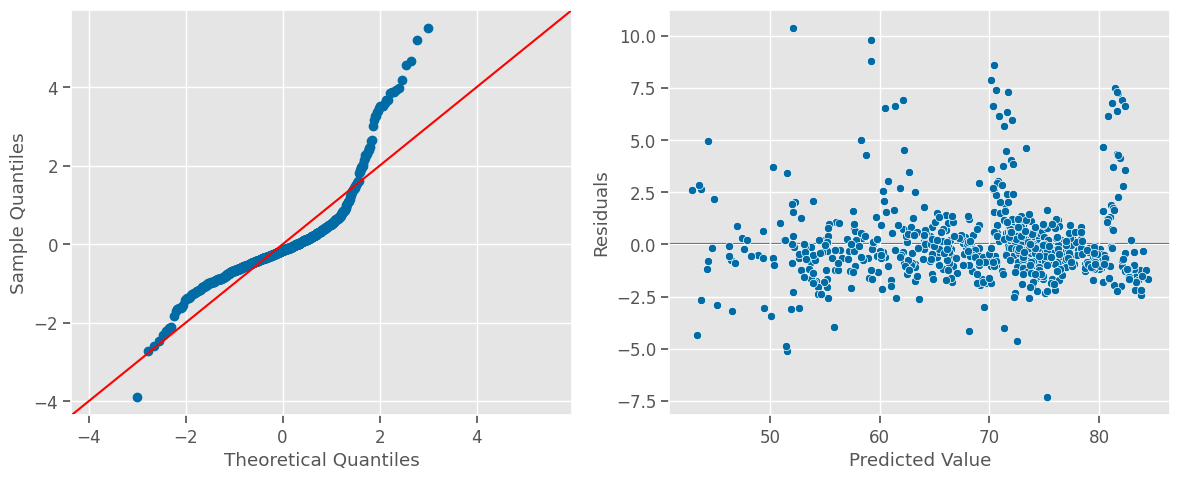

In [19]:
de.plot_residuals(lin_reg, X_test_df,y_test)

### Extracting and Visualizing Coefficients

#### Extracting Coefficients

In [20]:
# access the .coef_ 
coefs = lin_reg.coef_
coefs

array([ 2.65643525e-01, -2.42431449e-03,  1.09358034e-01, -6.43666262e-02,
        1.54176873e-04, -4.61834445e-03, -1.09788047e-05, -2.58843799e-03,
       -8.26439434e-02,  5.74972273e-03, -2.38515766e-02,  4.88333277e-03,
       -3.20474267e-01, -1.98269013e-05,  3.08373123e-09,  2.55582261e-02,
        1.62418622e-02, -2.24271395e-01,  1.46304933e-01, -9.20552189e+00,
        6.75554683e+00,  4.56606218e+00, -1.52498473e+01,  7.49749555e+00,
        6.31846591e+00,  5.20672236e+00,  2.44333752e+00,  3.23953167e+00,
        2.58842277e+00,  6.60969657e+00,  6.79645506e+00,  7.95678975e-01,
        6.02914008e+00,  2.04261880e+00,  1.15992811e+00,  1.35708452e+00,
       -9.29317076e+00, -2.49582508e+00, -3.94383959e-01,  7.58408227e+00,
       -6.16101358e+00,  3.88747846e+00,  7.45232635e+00, -5.41227054e+00,
       -9.13595449e+00, -1.04743048e+01,  4.48835272e+00, -3.77679424e+00,
       -1.02199578e+01,  1.30997811e+01, -1.52737658e+01, -1.37393973e+01,
        1.09330321e+01,  

In [21]:
# Intercept
intercept = lin_reg.intercept_
intercept

-456.09820951446005

In [22]:
## Saving the coefficients
coefs = pd.Series(coefs, index=lin_reg.feature_names_in_)
coefs

Year                       0.265644
Adult Mortality           -0.002424
infant deaths              0.109358
Alcohol                   -0.064367
percentage expenditure     0.000154
                            ...    
Country_Viet Nam           5.953278
Country_Yemen             -3.711449
Country_Zambia            -9.052081
Country_Zimbabwe          -8.419476
Status_Developing        -10.420587
Length: 203, dtype: float64

### def `get_coefficients`

In [23]:
# Define get_coefficients function to extract LinReg coefficients
def get_coefficients(lin_reg):
    coefs = lin_reg.coef_
    coefs = pd.Series(coefs, index=lin_reg.feature_names_in_)
    return coefs

get_coefficients(lin_reg)

Year                       0.265644
Adult Mortality           -0.002424
infant deaths              0.109358
Alcohol                   -0.064367
percentage expenditure     0.000154
                            ...    
Country_Viet Nam           5.953278
Country_Yemen             -3.711449
Country_Zambia            -9.052081
Country_Zimbabwe          -8.419476
Status_Developing        -10.420587
Length: 203, dtype: float64

## Scaled vs Unscaled Data

* **Scaled**: absolute value of coefficients show importance of features


* **Unscaled**: show impact of change on each feature on target.

In [24]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.4f}")


In [25]:
#Show sorted coefficients
coefs.sort_values()

Country_Sierra Leone               -19.3778
Country_Côte d'Ivoire              -15.5217
Country_Central African Republic   -15.2738
Country_Angola                     -15.2498
Country_Chad                       -13.7394
                                     ...   
Country_Republic of Korea           12.7306
Country_Israel                      12.7569
Country_Canada                      13.0998
Country_France                      13.1311
Country_Greece                      13.2200
Length: 203, dtype: float64

## Interpreting Coefficients

> Q: What does this coefficient tell us?

> **Target**: National Life expectancy

> **Coefficient**: Status_Developed = 5.3071

> <font color='green' size=3>**What does this coefficient tell us about the relationship between the feature and the target?**

## Visualizing Coefficients

#### **Q: How can we handle this many coefficients in our viz?**

- Some options include:
    - Only plot most the N most positive and N most negative.
    - Separate out OHE countries into a separate graph.
    
    
- Let's try the second option: separating the OHE countries.

In [26]:
## Get a list of all of the Country columns
country_feats = [c for c in X_train_df.columns if c.startswith('Country')]
country_feats

['Country_Afghanistan',
 'Country_Albania',
 'Country_Algeria',
 'Country_Angola',
 'Country_Antigua and Barbuda',
 'Country_Argentina',
 'Country_Armenia',
 'Country_Australia',
 'Country_Austria',
 'Country_Azerbaijan',
 'Country_Bahamas',
 'Country_Bahrain',
 'Country_Bangladesh',
 'Country_Barbados',
 'Country_Belarus',
 'Country_Belgium',
 'Country_Belize',
 'Country_Benin',
 'Country_Bhutan',
 'Country_Bolivia (Plurinational State of)',
 'Country_Bosnia and Herzegovina',
 'Country_Botswana',
 'Country_Brazil',
 'Country_Brunei Darussalam',
 'Country_Bulgaria',
 'Country_Burkina Faso',
 'Country_Burundi',
 'Country_Cabo Verde',
 'Country_Cambodia',
 'Country_Cameroon',
 'Country_Canada',
 'Country_Central African Republic',
 'Country_Chad',
 'Country_Chile',
 'Country_China',
 'Country_Colombia',
 'Country_Comoros',
 'Country_Congo',
 'Country_Costa Rica',
 'Country_Croatia',
 'Country_Cuba',
 'Country_Cyprus',
 'Country_Czechia',
 "Country_Côte d'Ivoire",
 "Country_Democratic Peo

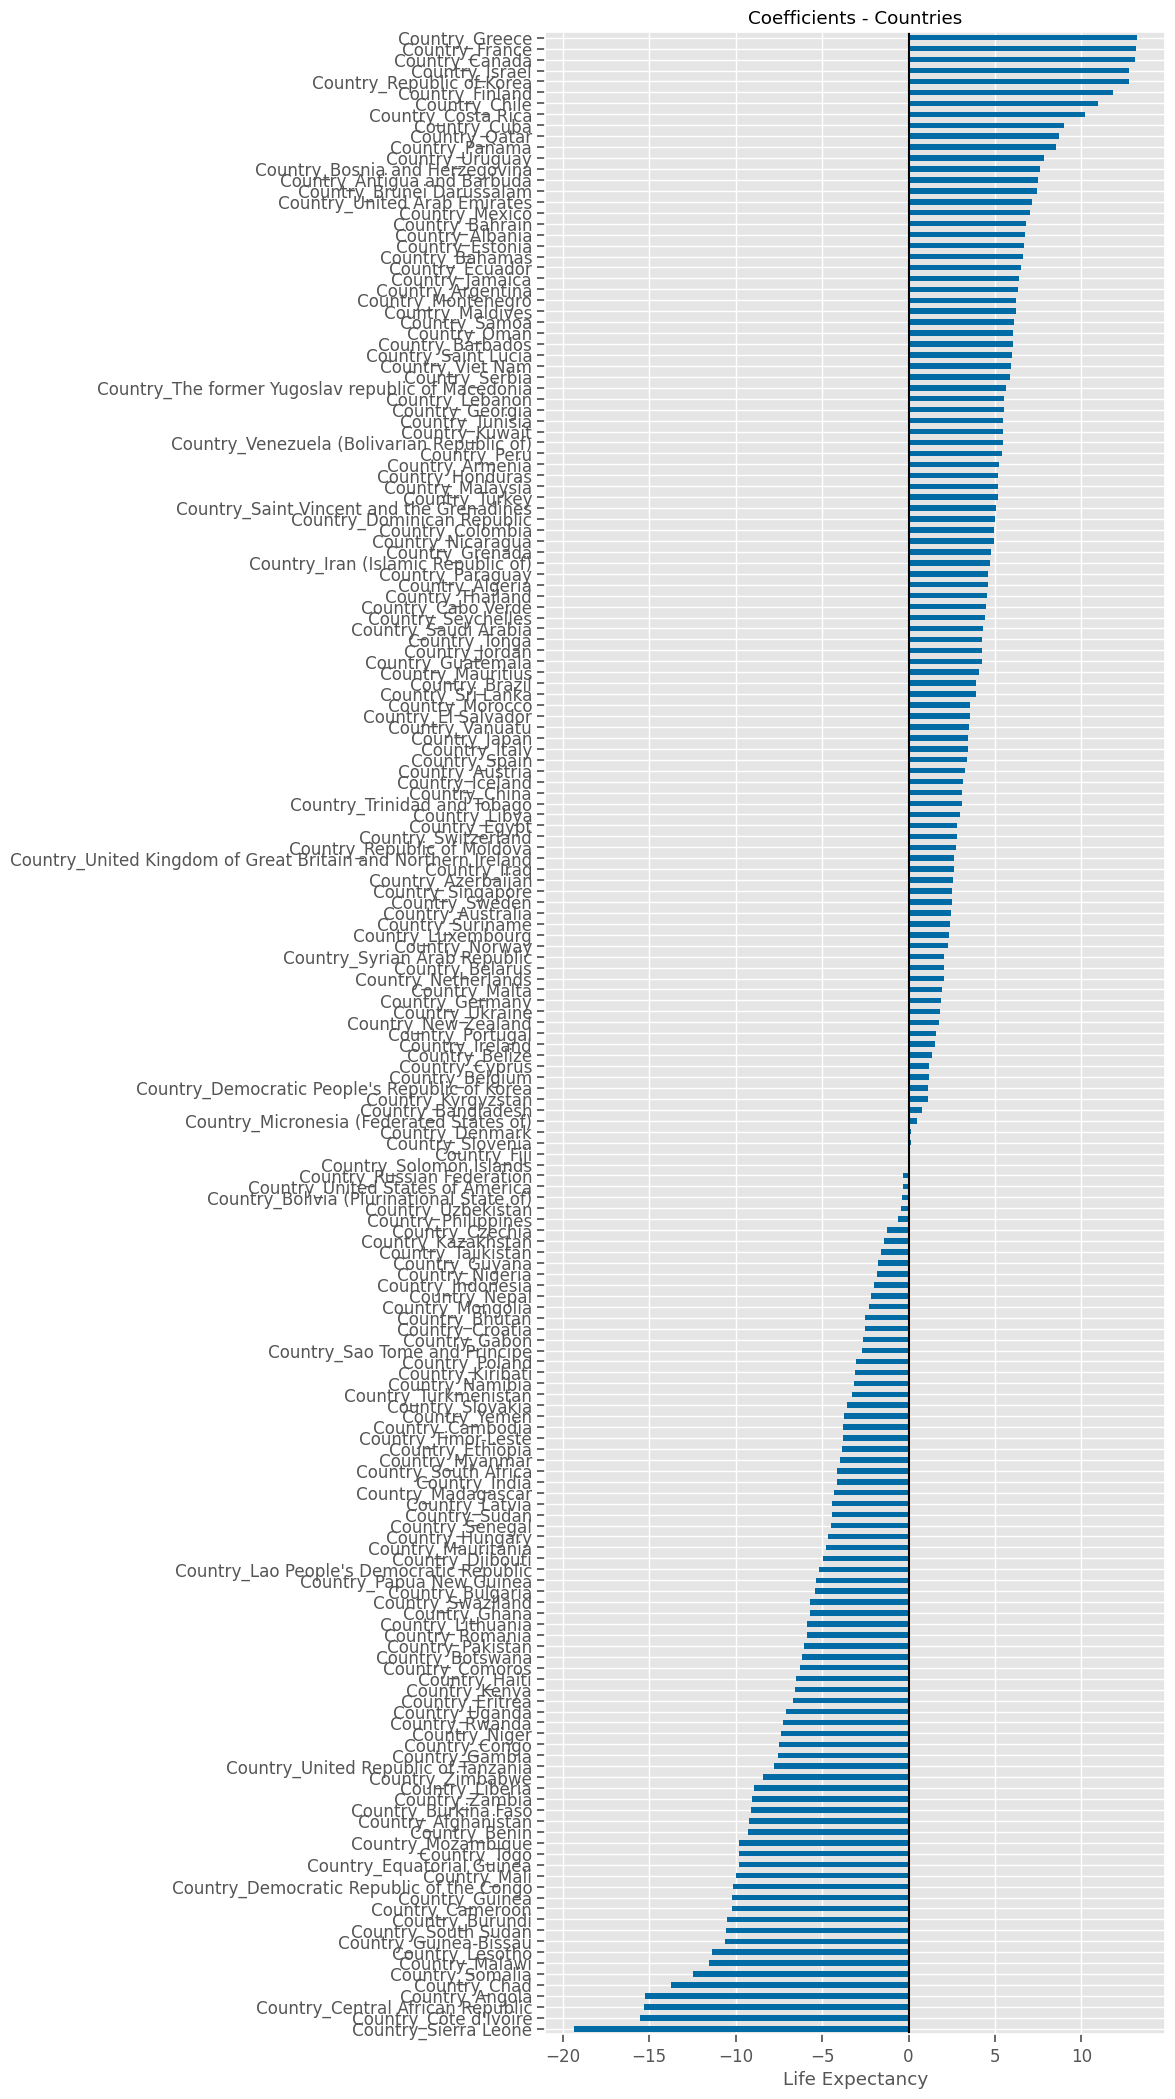

In [27]:
## Plot country ceoffs
ax = coefs[country_feats].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0, color='k')
ax.set(xlabel='Life Expectancy', title="Coefficients - Countries");

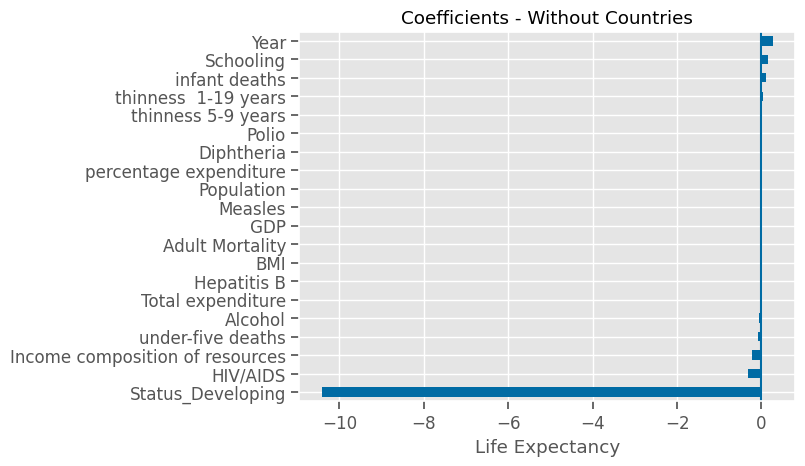

In [28]:
## Plot everything but countries
ax = coefs.drop(country_feats).sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Life Expectancy', title="Coefficients - Without Countries");

> ***Q1: What do we notice about our non-country coefficients? Is there anything odd that would be difficult to a stakeholder?***

> ***Q2: What does that intercept represent?***

> ***Q3: What would it mean if we did not use an intercept? (fit_intercept=False)***

## Other things to try to meet assumptions or get better coefficients.

1. Remove some multicollinear columns, like countries.
2. No intercept `LinearRegression(fit_intercept=False)`
3. Remove redundant categories with OneHotEncoder `OneHotEncoder(drop='first')` or `OneHotEncoder(drop='if_binary)`.

Let's try these:

In [29]:
lin_reg_drop = LinearRegression()
X_train_df = X_train_df.drop(columns=country_feats)
X_test_df = X_test_df.drop(columns=country_feats)

lin_reg_drop.fit(X_train_df, y_train)


LinearRegression()

In [30]:
evaluate_regression(lin_reg_drop, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.82,3.00,4.02
Test,0.82,3.06,4.12


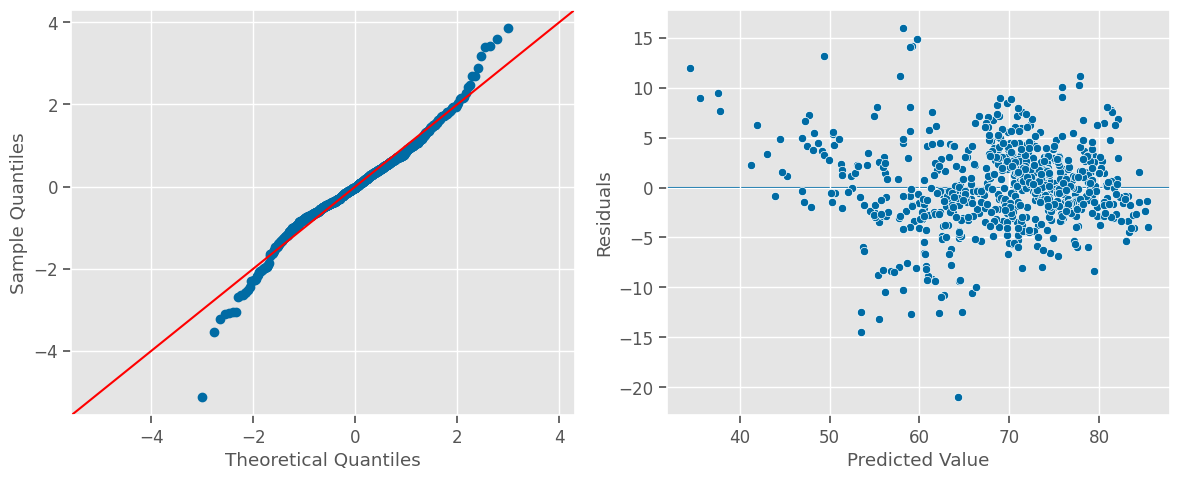

In [31]:
de.plot_residuals(lin_reg_drop, X_test_df,y_test)

In [32]:
coefs = get_coefficients(lin_reg_drop)
print(lin_reg_drop.intercept_)
coefs.sort_values()

89.69300579212796


Status_Developing                 -1.4844
HIV/AIDS                          -0.4789
under-five deaths                 -0.0810
thinness  1-19 years              -0.0498
thinness 5-9 years                -0.0265
Adult Mortality                   -0.0193
Year                              -0.0168
Hepatitis B                       -0.0096
Measles                           -0.0000
Population                         0.0000
percentage expenditure             0.0000
GDP                                0.0000
Polio                              0.0250
Diphtheria                         0.0377
BMI                                0.0391
Alcohol                            0.0556
Total expenditure                  0.1062
infant deaths                      0.1070
Schooling                          0.6857
Income composition of resources    5.7370
dtype: float64

<Axes: >

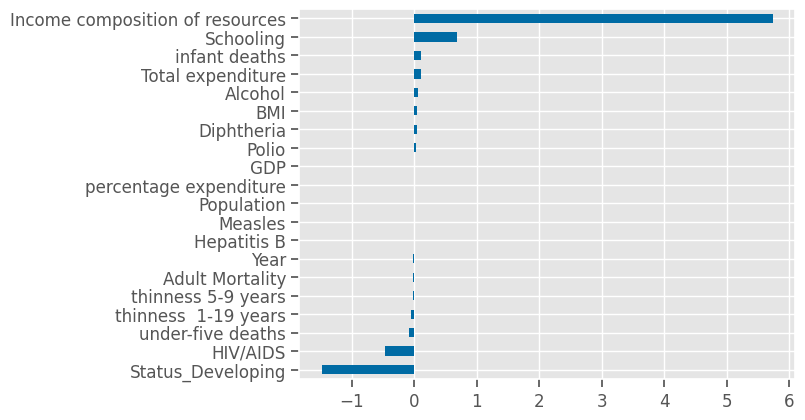

In [38]:
get_coefficients(lin_reg_drop).sort_values().plot(kind='barh')

Why does GDP per Capita seem to have no effect on Life Expectancy?

In [33]:
X_train_df['GDP'].median()

3184.7556715

The median GDP per Capita in the dataset is $3,184 US.

In [34]:
coefs['GDP']

4.450344809021089e-05

GDP per Capita adds 1 year of life for every 44,500 US Dollars of GDP per Capita.  

In [35]:
X_train_df['GDP'].median() * coefs['GDP']

0.14173260870660498

Countries with the median average GDP per Capita add about 2 months of expected life from this feature.

In [36]:
X_train_df['GDP'].max()

119172.7418

In [37]:
X_train_df['GDP'].max() * coefs['GDP']

5.303597928464406

The country with the highest GDP per Capita adds 5 years to life expectancy with this feature.

## Feature Importance

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df,y_train)
evaluate_regression(rf_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.99,0.45,0.71
Test,0.97,1.11,1.75


> Using the models .feature_names_in_

In [41]:
# Extract Feature Importances
importances = pd.Series(rf_reg.feature_importances_, index=rf_reg.feature_names_in_)
importances.sort_values()

Status_Developing                 0.0001
Hepatitis B                       0.0024
Measles                           0.0028
Population                        0.0032
percentage expenditure            0.0035
Polio                             0.0040
GDP                               0.0042
Diphtheria                        0.0044
thinness  1-19 years              0.0059
Total expenditure                 0.0060
Alcohol                           0.0065
infant deaths                     0.0070
Year                              0.0076
thinness 5-9 years                0.0096
BMI                               0.0114
under-five deaths                 0.0151
Schooling                         0.0185
Adult Mortality                   0.1251
Income composition of resources   0.1636
HIV/AIDS                          0.5991
dtype: float64

In [42]:
# create a function to extract importances
def get_importances(rf_reg):
    importances = pd.Series(rf_reg.feature_importances_, index=rf_reg.feature_names_in_)
    return importances
get_importances(rf_reg)

Year                              0.0076
Adult Mortality                   0.1251
infant deaths                     0.0070
Alcohol                           0.0065
percentage expenditure            0.0035
Hepatitis B                       0.0024
Measles                           0.0028
BMI                               0.0114
under-five deaths                 0.0151
Polio                             0.0040
Total expenditure                 0.0060
Diphtheria                        0.0044
HIV/AIDS                          0.5991
GDP                               0.0042
Population                        0.0032
thinness  1-19 years              0.0059
thinness 5-9 years                0.0096
Income composition of resources   0.1636
Schooling                         0.0185
Status_Developing                 0.0001
dtype: float64

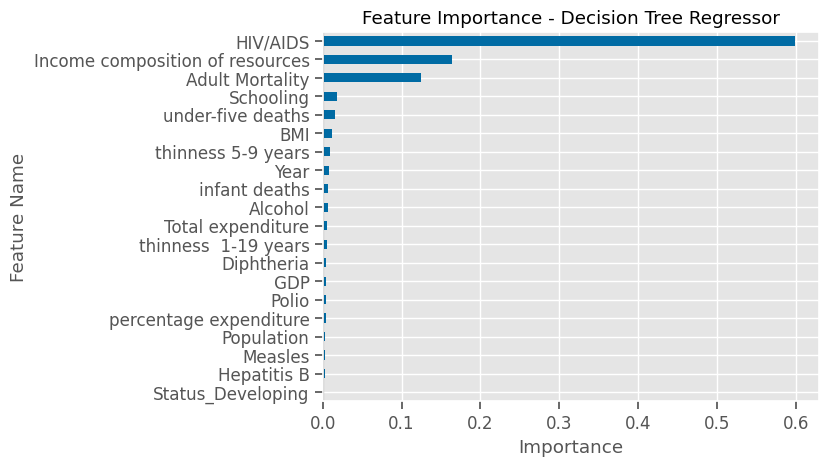

In [43]:
# Plot Importances
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');


> **Q1:** What do these numbers mean?

> **Q2:** What are the top 5 most important features?

## Using joblib to Save our Model, Data, and Objects

In [44]:
X_train.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2414,South Sudan,2010,Developing,359.0000,27,NaN,0.0000,NaN,0,NaN,41,NaN,NaN,NaN,4.0000,"1,562.2393","167,192.0000",NaN,NaN,0.0000,0.0000
1576,Malawi,2009,Developing,491.0000,36,1.1600,7.9151,93.0000,21,17.3000,56,93.0000,1.1800,93.0000,14.9000,42.7380,"1,471,462.0000",6.9000,6.8000,0.4150,9.9000
2559,Tajikistan,2009,Developing,174.0000,10,0.3000,35.7161,93.0000,0,35.9000,12,93.0000,5.9300,93.0000,0.2000,666.3459,"7,472,819.0000",3.7000,3.8000,0.6010,11.1000
1524,Lithuania,2013,Developed,178.0000,0,15.0400,"1,968.8168",93.0000,35,61.4000,0,93.0000,6.5900,93.0000,0.1000,"15,712.8238","2,957,689.0000",2.7000,2.7000,0.8340,16.4000
33,Algeria,2014,Developing,11.0000,21,0.0100,54.2373,95.0000,0,58.4000,24,95.0000,7.2100,95.0000,0.1000,547.8517,"39,113,313.0000",6.0000,5.8000,0.7410,14.4000


In [45]:
evaluate_regression(lin_reg_drop, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.82,3.00,4.02
Test,0.82,3.06,4.12


In [46]:
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.99,0.45,0.71
Test,0.97,1.11,1.75


In [47]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train':y_train,
         'X_test':X_test,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg_drop,
          'RandomForestRegressor':rf_reg
         }

In [48]:
# Create the folder to save it in
folder = '../Models/'
os.makedirs(folder, exist_ok=True)

In [49]:
# Save the models, data, and preprocessor
fname=folder + 'wk1-lect01-codealong.joblib'
joblib.dump(export, fname)

['../Models/wk1-lect01-codealong.joblib']

In [50]:
# try Loading again to make sure it works.

loaded = joblib.load(fname)
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

> We will continue working with this task and these models next class!

# *Teaser* Shap (For Regression)

In [51]:
# Import and init shap
import shap
shap.initjs()

In [52]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500,random_state=SEED)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(rf_reg)

## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


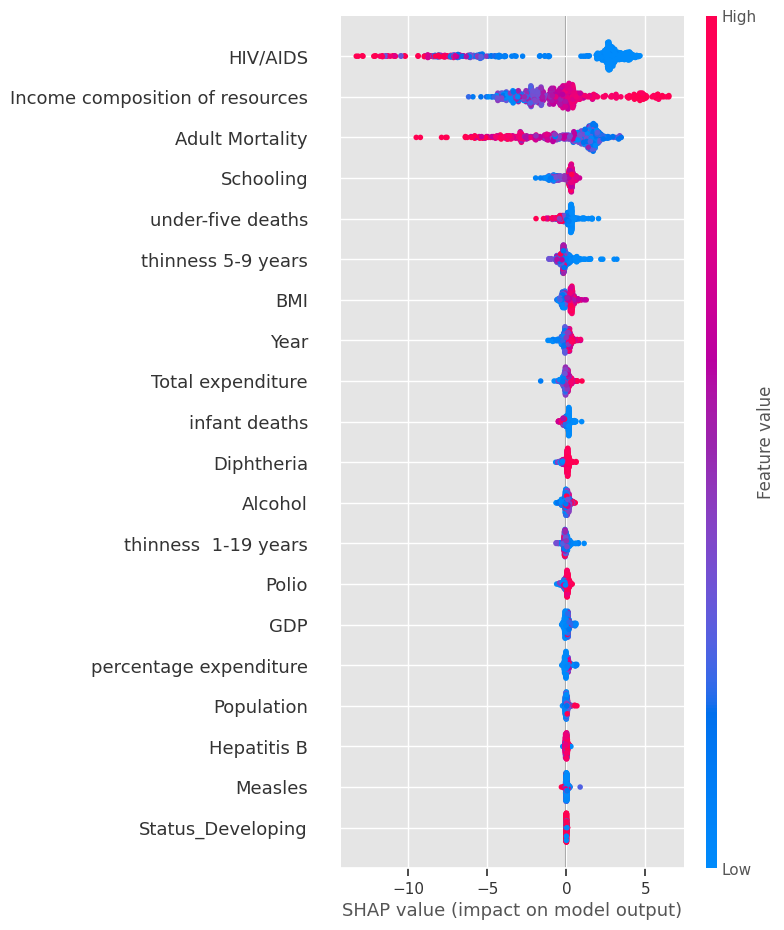

In [53]:
shap.summary_plot(shap_values, features = X_shap)